In [2]:
import pandas as pd
import numpy as np
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.core.converters import Loader, Saver
jvm.start()
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
INFO:weka.core.jvm:JVM already running, call jvm.stop() first


X and y are the training data features and outputs correspondingly
To become acquainted with weka let us classify directly without application of CV for test error estimation
Once we get acquainted, we'll then use CV to optain the test error estimate
Then we will refit the model on the entire train sets, and then use that fit model for drawing ROC, obtaining AUC and plotting the confusion matrices

In [3]:
df_train = pd.read_csv('aps_train.csv',index_col=0)
print(df_train)

       class  aa_000    ab_000        ac_000      ad_000  ae_000  af_000  \
0          0   76698  0.000000  2.130706e+09  280.000000     0.0     0.0   
1          0   33058  0.645959  0.000000e+00  638.509566     0.0     0.0   
2          0   41040  0.644207  2.280000e+02  100.000000     0.0     0.0   
3          0      12  0.000000  7.000000e+01   66.000000     0.0    10.0   
4          0   60874  0.035666  1.368000e+03  458.000000     0.0     0.0   
...      ...     ...       ...           ...         ...     ...     ...   
59995      0  153002  0.355823  6.640000e+02  186.000000     0.0     0.0   
59996      0    2286  0.000000  2.130707e+09  224.000000     0.0     0.0   
59997      0     112  0.000000  2.130706e+09   18.000000     0.0     0.0   
59998      0   80292  0.117141  2.130706e+09  494.000000     0.0     0.0   
59999      0   40222  0.001512  6.980000e+02  628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0     

In [4]:
for i in np.arange(0,60000):
    if df_train.iloc[i,0]==0:
        df_train.iloc[i,0] = 'neg'
    else:
        df_train.iloc[i,0] = 'pos'

print(df_train)

      class  aa_000    ab_000        ac_000      ad_000  ae_000  af_000  \
0       neg   76698  0.000000  2.130706e+09  280.000000     0.0     0.0   
1       neg   33058  0.645959  0.000000e+00  638.509566     0.0     0.0   
2       neg   41040  0.644207  2.280000e+02  100.000000     0.0     0.0   
3       neg      12  0.000000  7.000000e+01   66.000000     0.0    10.0   
4       neg   60874  0.035666  1.368000e+03  458.000000     0.0     0.0   
...     ...     ...       ...           ...         ...     ...     ...   
59995   neg  153002  0.355823  6.640000e+02  186.000000     0.0     0.0   
59996   neg    2286  0.000000  2.130707e+09  224.000000     0.0     0.0   
59997   neg     112  0.000000  2.130706e+09   18.000000     0.0     0.0   
59998   neg   80292  0.117141  2.130706e+09  494.000000     0.0     0.0   
59999   neg   40222  0.001512  6.980000e+02  628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     

In [5]:
df_train.to_csv('aps_train_for_weka.csv') # We'll edit this for weka so that indices are removed

In [6]:
loader = Loader(classname="weka.core.converters.CSVLoader")

In [7]:
data = loader.load_file("aps_train_for_weka_index_normal.csv")
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
data.class_is_first()
cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls.build_classifier(data)
for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))

1: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10: label index=1.0, class distribution=[0. 1.]
11: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15: label index=0.0, clas

426: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
427: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
428: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
429: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
430: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
431: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
432: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
433: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
434: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
435: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
436: label index=0.0, class distribution=[1. 0.]
437: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
438: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
439: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44

860: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
861: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
862: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
863: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
864: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
865: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
866: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
867: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
868: label index=0.0, class distribution=[0.984375 0.015625]
869: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
870: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
871: label index=1.0, class distribution=[0. 1.]
872: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
873: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
874: label ind

1326: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1327: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1328: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1329: label index=0.0, class distribution=[0.94444444 0.05555556]
1330: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1331: label index=0.0, class distribution=[0.99709302 0.00290698]
1332: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1333: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1334: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1335: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1336: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1337: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1338: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1339: label index=0.0, class distribution=[9.99395599e

1767: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1768: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1769: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1770: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1771: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1772: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1773: label index=0.0, class distribution=[0.98305085 0.01694915]
1774: label index=0.0, class distribution=[0.984375 0.015625]
1775: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1776: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1777: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1778: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1779: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
1780: label index=0.0, class distribution=[9.99395599e-01 

2201: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2202: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2203: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2204: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2205: label index=0.0, class distribution=[0.99457995 0.00542005]
2206: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2207: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2208: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2209: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2210: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2211: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2212: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2213: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2214: label index=0.0, class distribution=[9.9

2648: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2649: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2650: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2651: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2652: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2653: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2654: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2655: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2656: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2657: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2658: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2659: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2660: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
2661: label index=0.0, class distribut

3120: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3121: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3122: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3123: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3124: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3125: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3126: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3127: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3128: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3129: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3130: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3131: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3132: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3133: label index=0.0, class distribut

3565: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3566: label index=0.0, class distribution=[1. 0.]
3567: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3568: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3569: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3570: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3571: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3572: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3573: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3574: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3575: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3576: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3577: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
3578: label index=0.0, class distribution=[9.99395599e-01 6.04

3999: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4000: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4001: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4002: label index=0.0, class distribution=[1. 0.]
4003: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4004: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4005: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4006: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4007: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4008: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4009: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4010: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4011: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4012: label index=0.0, class distribution=[9.99395599e-01 6.04

4428: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4429: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4430: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4431: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4432: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4433: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4434: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4435: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4436: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4437: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4438: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4439: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4440: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4441: label index=0.0, class distribut

4899: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4900: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4901: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4902: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4903: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4904: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4905: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4906: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4907: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4908: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4909: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4910: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4911: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
4912: label index=0.0, class distribut

5340: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5341: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5342: label index=0.0, class distribution=[0.99457995 0.00542005]
5343: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5344: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5345: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5346: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5347: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5348: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5349: label index=0.0, class distribution=[1. 0.]
5350: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5351: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5352: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5353: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-

5776: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5777: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5778: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5779: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5780: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5781: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5782: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5783: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5784: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5785: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5786: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5787: label index=0.0, class distribution=[0.97080292 0.02919708]
5788: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
5789: label index=0.0, class distribution=[9.9

6215: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6216: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6217: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6218: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6219: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6220: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6221: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6222: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6223: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6224: label index=0.0, class distribution=[0.9858156 0.0141844]
6225: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6226: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6227: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6228: label index=0.0, class distribution=[9.993

6695: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6696: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6697: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6698: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6699: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6700: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6701: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6702: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6703: label index=0.0, class distribution=[1. 0.]
6704: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6705: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6706: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6707: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
6708: label index=0.0, class distribution=[9.99395599e-01 6.04

7133: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7134: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7135: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7136: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7137: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7138: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7139: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7140: label index=0.0, class distribution=[0.99457995 0.00542005]
7141: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7142: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7143: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7144: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7145: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7146: label index=0.0, class distribution=[9.9

7571: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7572: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7573: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7574: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7575: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7576: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7577: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7578: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7579: label index=0.0, class distribution=[1. 0.]
7580: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7581: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7582: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7583: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
7584: label index=0.0, class distribution=[9.99395599e-01 6.04

8011: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8012: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8013: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8014: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8015: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8016: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8017: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8018: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8019: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8020: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8021: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8022: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8023: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8024: label index=0.0, class distribut

8481: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8482: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8483: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8484: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8485: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8486: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8487: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8488: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8489: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8490: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8491: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8492: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8493: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8494: label index=0.0, class distribut

8928: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8929: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8930: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8931: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8932: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8933: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8934: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8935: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8936: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8937: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8938: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8939: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8940: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
8941: label index=0.0, class distribut

9365: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9366: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9367: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9368: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9369: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9370: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9371: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9372: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9373: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9374: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9375: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9376: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9377: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9378: label index=0.0, class distribut

9805: label index=1.0, class distribution=[0.04761905 0.95238095]
9806: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9807: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9808: label index=1.0, class distribution=[0. 1.]
9809: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9810: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9811: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9812: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9813: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9814: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9815: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9816: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9817: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
9818: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-

10288: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10289: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10290: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10291: label index=0.0, class distribution=[1. 0.]
10292: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10293: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10294: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10295: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10296: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10297: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10298: label index=1.0, class distribution=[0. 1.]
10299: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10300: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10301: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04

10727: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10728: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10729: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10730: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10731: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10732: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10733: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10734: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10735: label index=0.0, class distribution=[0.9858156 0.0141844]
10736: label index=0.0, class distribution=[1. 0.]
10737: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10738: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10739: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
10740: label index=0.0, class distribution=[0.98039216 0.01

11167: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11168: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11169: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11170: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11171: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11172: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11173: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11174: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11175: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11176: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11177: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11178: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11179: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11180: label index=0.0, c

11595: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11596: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11597: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11598: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11599: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11600: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11601: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11602: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11603: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11604: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11605: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11606: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11607: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
11608: label index=0.0, c

12080: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12081: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12082: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12083: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12084: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12085: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12086: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12087: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12088: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12089: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12090: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12091: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12092: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12093: label index=0.0, c

12522: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12523: label index=0.0, class distribution=[0.99180328 0.00819672]
12524: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12525: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12526: label index=1.0, class distribution=[0. 1.]
12527: label index=0.0, class distribution=[0.99709302 0.00290698]
12528: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12529: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12530: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12531: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12532: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12533: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12534: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12535: label index=0.0, class distribution=[9.99395599e-01 6.0440

12958: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12959: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12960: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12961: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12962: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12963: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12964: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12965: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12966: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12967: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12968: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12969: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12970: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
12971: label index=0.0, c

13399: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13400: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13401: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13402: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13403: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13404: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13405: label index=0.0, class distribution=[1. 0.]
13406: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13407: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13408: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13409: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13410: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13411: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13412: label index=0.0, class distribution=[9.993

13880: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13881: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13882: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13883: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13884: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13885: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13886: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13887: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13888: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13889: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13890: label index=0.0, class distribution=[1. 0.]
13891: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13892: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
13893: label index=0.0, class distribution=[9.993

14319: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14320: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14321: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14322: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14323: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14324: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14325: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14326: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14327: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14328: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14329: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14330: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14331: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14332: label index=0.0, c

14759: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14760: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14761: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14762: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14763: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14764: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14765: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14766: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14767: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14768: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14769: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14770: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14771: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
14772: label index=0.0, c

15198: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15199: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15200: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15201: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15202: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15203: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15204: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15205: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15206: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15207: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15208: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15209: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15210: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15211: label index=0.0, c

15671: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15672: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15673: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15674: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15675: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15676: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15677: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15678: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15679: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15680: label index=0.0, class distribution=[0.99709302 0.00290698]
15681: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15682: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
15683: label index=0.0, class distribution=[0.99709302 0.00290698]
15684: label index=0.0, class distributio

16110: label index=0.0, class distribution=[0.99709302 0.00290698]
16111: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16112: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16113: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16114: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16115: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16116: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16117: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16118: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16119: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16120: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16121: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16122: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16123: label index=0.0, class dis

16544: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16545: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16546: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16547: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16548: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16549: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16550: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16551: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16552: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16553: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16554: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16555: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16556: label index=0.0, class distribution=[0.984375 0.015625]
16557: label index=0.0, class distrib

16976: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16977: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16978: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16979: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16980: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16981: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16982: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16983: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16984: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16985: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16986: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16987: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16988: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
16989: label index=0.0, c

17447: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17448: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17449: label index=1.0, class distribution=[0. 1.]
17450: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17451: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17452: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17453: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17454: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17455: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17456: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17457: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17458: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17459: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17460: label index=0.0, class distribution=[9.993

17888: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17889: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17890: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17891: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17892: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17893: label index=0.0, class distribution=[0.97080292 0.02919708]
17894: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17895: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17896: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17897: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17898: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17899: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17900: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
17901: label index=0.0, class dis

18324: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18325: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18326: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18327: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18328: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18329: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18330: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18331: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18332: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18333: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18334: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18335: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18336: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18337: label index=0.0, c

18755: label index=0.0, class distribution=[1. 0.]
18756: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18757: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18758: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18759: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18760: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18761: label index=1.0, class distribution=[0. 1.]
18762: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18763: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18764: label index=1.0, class distribution=[0. 1.]
18765: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18766: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18767: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18768: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
18769: label index=0.0

19227: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19228: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19229: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19230: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19231: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19232: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19233: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19234: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19235: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19236: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19237: label index=0.0, class distribution=[0.9858156 0.0141844]
19238: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19239: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19240: label index=0.0, class distr

19669: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19670: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19671: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19672: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19673: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19674: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19675: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19676: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19677: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19678: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19679: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19680: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19681: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
19682: label index=0.0, c

20100: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20101: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20102: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20103: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20104: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20105: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20106: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20107: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20108: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20109: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20110: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20111: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20112: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20113: label index=0.0, c

20543: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20544: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20545: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20546: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20547: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20548: label index=0.0, class distribution=[0.99056604 0.00943396]
20549: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20550: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20551: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20552: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20553: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20554: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20555: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
20556: label index=0.0, class dis

21017: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21018: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21019: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21020: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21021: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21022: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21023: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21024: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21025: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21026: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21027: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21028: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21029: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21030: label index=0.0, c

21456: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21457: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21458: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21459: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21460: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21461: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21462: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21463: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21464: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21465: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21466: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21467: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21468: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21469: label index=0.0, c

21895: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21896: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21897: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21898: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21899: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21900: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21901: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21902: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21903: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21904: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21905: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21906: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21907: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
21908: label index=0.0, c

22329: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22330: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22331: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22332: label index=0.0, class distribution=[0.97080292 0.02919708]
22333: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22334: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22335: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22336: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22337: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22338: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22339: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22340: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22341: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22342: label index=0.0, class dis

22802: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22803: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22804: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22805: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22806: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22807: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22808: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22809: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22810: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22811: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22812: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22813: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22814: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
22815: label index=0.0, c

23242: label index=0.0, class distribution=[1. 0.]
23243: label index=0.0, class distribution=[0.97080292 0.02919708]
23244: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23245: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23246: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23247: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23248: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23249: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23250: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23251: label index=0.0, class distribution=[0.98305085 0.01694915]
23252: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23253: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23254: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23255: label index=0.0, class distribution=[9.99395599e-01 6.0440

23677: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23678: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23679: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23680: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23681: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23682: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23683: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23684: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23685: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23686: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23687: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23688: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23689: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
23690: label index=0.0, c

24112: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24113: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24114: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24115: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24116: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24117: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24118: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24119: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24120: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24121: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24122: label index=0.0, class distribution=[0.984375 0.015625]
24123: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24124: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24125: label index=0.0, class distrib

24581: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24582: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24583: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24584: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24585: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24586: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24587: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24588: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24589: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24590: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24591: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24592: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24593: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
24594: label index=0.0, c

25023: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25024: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25025: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25026: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25027: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25028: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25029: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25030: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25031: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25032: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25033: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25034: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25035: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25036: label index=0.0, c

25452: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25453: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25454: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25455: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25456: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25457: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25458: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25459: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25460: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25461: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25462: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25463: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25464: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25465: label index=0.0, c

25888: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25889: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25890: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25891: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25892: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25893: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25894: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25895: label index=0.0, class distribution=[1. 0.]
25896: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25897: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25898: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25899: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25900: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
25901: label index=0.0, class distribution=[9.993

26357: label index=0.0, class distribution=[0.99180328 0.00819672]
26358: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26359: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26360: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26361: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26362: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26363: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26364: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26365: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26366: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26367: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26368: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26369: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26370: label index=0.0, class dis

26780: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26781: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26782: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26783: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26784: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26785: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26786: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26787: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26788: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26789: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26790: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26791: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26792: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
26793: label index=0.0, c

27215: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27216: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27217: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27218: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27219: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27220: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27221: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27222: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27223: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27224: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27225: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27226: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27227: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27228: label index=0.0, c

27653: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27654: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27655: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27656: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27657: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27658: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27659: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27660: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27661: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27662: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27663: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27664: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
27665: label index=0.0, class distribution=[0.96969697 0.03030303]
27666: label index=0.0, class dis

28129: label index=0.0, class distribution=[1. 0.]
28130: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28131: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28132: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28133: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28134: label index=0.0, class distribution=[0.98305085 0.01694915]
28135: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28136: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28137: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28138: label index=0.0, class distribution=[1. 0.]
28139: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28140: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28141: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28142: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28143:

28569: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28570: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28571: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28572: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28573: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28574: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28575: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28576: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28577: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28578: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28579: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28580: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28581: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
28582: label index=0.0, c

29004: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29005: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29006: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29007: label index=0.0, class distribution=[0.99457995 0.00542005]
29008: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29009: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29010: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29011: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29012: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29013: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29014: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29015: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29016: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29017: label index=0.0, class dis

29443: label index=0.0, class distribution=[0.99310345 0.00689655]
29444: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29445: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29446: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29447: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29448: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29449: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29450: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29451: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29452: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29453: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29454: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29455: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29456: label index=0.0, class dis

29918: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29919: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29920: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29921: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29922: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29923: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29924: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29925: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29926: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29927: label index=1.0, class distribution=[0. 1.]
29928: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29929: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29930: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
29931: label index=0.0, class distribution=[9.993

30356: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30357: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30358: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30359: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30360: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30361: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30362: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30363: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30364: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30365: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30366: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30367: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30368: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30369: label index=0.0, c

30795: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30796: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30797: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30798: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30799: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30800: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30801: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30802: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30803: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30804: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30805: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30806: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
30807: label index=0.0, class distribution=[0.99056604 0.00943396]
30808: label index=0.0, class dis

31229: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31230: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31231: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31232: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31233: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31234: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31235: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31236: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31237: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31238: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31239: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31240: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31241: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31242: label index=0.0, c

31705: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31706: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31707: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31708: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31709: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31710: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31711: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31712: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31713: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31714: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31715: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31716: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31717: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
31718: label index=0.0, c

32146: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32147: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32148: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32149: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32150: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32151: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32152: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32153: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32154: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32155: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32156: label index=0.0, class distribution=[0.99180328 0.00819672]
32157: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32158: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32159: label index=0.0, class dis

32580: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32581: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32582: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32583: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32584: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32585: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32586: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32587: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32588: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32589: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32590: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32591: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32592: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
32593: label index=0.0, c

33018: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33019: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33020: label index=1.0, class distribution=[0. 1.]
33021: label index=0.0, class distribution=[0.984375 0.015625]
33022: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33023: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33024: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33025: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33026: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33027: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33028: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33029: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33030: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33031: label index=0.0, class distribution=[9.99395599e-01 6.

33484: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33485: label index=0.0, class distribution=[0.9858156 0.0141844]
33486: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33487: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33488: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33489: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33490: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33491: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33492: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33493: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33494: label index=1.0, class distribution=[0. 1.]
33495: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33496: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33497: label index=0.0, class distribution=[9.99395599e-01 

33927: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33928: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33929: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33930: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33931: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33932: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33933: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33934: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33935: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33936: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33937: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33938: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33939: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
33940: label index=0.0, c

34365: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34366: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34367: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34368: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34369: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34370: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34371: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34372: label index=0.0, class distribution=[1. 0.]
34373: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34374: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34375: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34376: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34377: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34378: label index=0.0, class distribution=[9.993

34806: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34807: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34808: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34809: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34810: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34811: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34812: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34813: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34814: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34815: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34816: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34817: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34818: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
34819: label index=0.0, c

35282: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35283: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35284: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35285: label index=0.0, class distribution=[0.99310345 0.00689655]
35286: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35287: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35288: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35289: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35290: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35291: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35292: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35293: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35294: label index=0.0, class distribution=[0.99180328 0.00819672]
35295: label index=0.0, class distributio

35717: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35718: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35719: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35720: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35721: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35722: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35723: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35724: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35725: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35726: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35727: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35728: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35729: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
35730: label index=0.0, c

36140: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36141: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36142: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36143: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36144: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36145: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36146: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36147: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36148: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36149: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36150: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36151: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36152: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36153: label index=0.0, c

36576: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36577: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36578: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36579: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36580: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36581: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36582: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36583: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36584: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36585: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36586: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36587: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36588: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
36589: label index=0.0, c

37047: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37048: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37049: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37050: label index=0.0, class distribution=[0.99457995 0.00542005]
37051: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37052: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37053: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37054: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37055: label index=0.0, class distribution=[0.98809524 0.01190476]
37056: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37057: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37058: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37059: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37060: label index=0.0, class distributio

37484: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37485: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37486: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37487: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37488: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37489: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37490: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37491: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37492: label index=0.0, class distribution=[1. 0.]
37493: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37494: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37495: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37496: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37497: label index=0.0, class distribution=[9.993

37914: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37915: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37916: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37917: label index=1.0, class distribution=[0. 1.]
37918: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37919: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37920: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37921: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37922: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37923: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37924: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37925: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37926: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
37927: label index=0.0, class distribution=[9.993

38357: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38358: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38359: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38360: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38361: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38362: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38363: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38364: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38365: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38366: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38367: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38368: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38369: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38370: label index=0.0, c

38834: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38835: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38836: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38837: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38838: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38839: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38840: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38841: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38842: label index=0.0, class distribution=[0.99709302 0.00290698]
38843: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38844: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38845: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
38846: label index=0.0, class distribution=[1. 0.]
38847: label index=0.0, class distribution=[9.99395599e-0

39274: label index=0.0, class distribution=[1. 0.]
39275: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39276: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39277: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39278: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39279: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39280: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39281: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39282: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39283: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39284: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39285: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39286: label index=0.0, class distribution=[0.97619048 0.02380952]
39287: label index=0.0, class distribution=[9.99395599e-0

39702: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39703: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39704: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39705: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39706: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39707: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39708: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39709: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39710: label index=0.0, class distribution=[0.984375 0.015625]
39711: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39712: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39713: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39714: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
39715: label index=0.0, class distrib

40139: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40140: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40141: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40142: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40143: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40144: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40145: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40146: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40147: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40148: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40149: label index=0.0, class distribution=[0.97080292 0.02919708]
40150: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40151: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40152: label index=0.0, class dis

40611: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40612: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40613: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40614: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40615: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40616: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40617: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40618: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40619: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40620: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40621: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40622: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
40623: label index=0.0, class distribution=[0.99709302 0.00290698]
40624: label index=0.0, class dis

41049: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41050: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41051: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41052: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41053: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41054: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41055: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41056: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41057: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41058: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41059: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41060: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41061: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41062: label index=0.0, c

41484: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41485: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41486: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41487: label index=0.0, class distribution=[0.99709302 0.00290698]
41488: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41489: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41490: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41491: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41492: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41493: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41494: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41495: label index=0.0, class distribution=[0.99310345 0.00689655]
41496: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41497: label index=0.0, class distributio

41920: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41921: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41922: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41923: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41924: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41925: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41926: label index=0.0, class distribution=[0.97619048 0.02380952]
41927: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41928: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41929: label index=0.0, class distribution=[0.97080292 0.02919708]
41930: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41931: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41932: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
41933: label index=0.0, class distributio

42397: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42398: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42399: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42400: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42401: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42402: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42403: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42404: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42405: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42406: label index=0.0, class distribution=[0.984375 0.015625]
42407: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42408: label index=0.0, class distribution=[0.99180328 0.00819672]
42409: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42410: label index=0.0, class distribution=[9

42835: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42836: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42837: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42838: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42839: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42840: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42841: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42842: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42843: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42844: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42845: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42846: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42847: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
42848: label index=0.0, c

43270: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43271: label index=0.0, class distribution=[1. 0.]
43272: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43273: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43274: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43275: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43276: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43277: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43278: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43279: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43280: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43281: label index=0.0, class distribution=[0.99457995 0.00542005]
43282: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43283: label index=0.0, class distribution=[9.99395599e-0

43700: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43701: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43702: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43703: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43704: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43705: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43706: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43707: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43708: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43709: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43710: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43711: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43712: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
43713: label index=0.0, c

44177: label index=0.0, class distribution=[1. 0.]
44178: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44179: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44180: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44181: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44182: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44183: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44184: label index=1.0, class distribution=[0. 1.]
44185: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44186: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44187: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44188: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44189: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44190: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04

44619: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44620: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44621: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44622: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44623: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44624: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44625: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44626: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44627: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44628: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44629: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44630: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44631: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
44632: label index=0.0, c

45055: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45056: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45057: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45058: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45059: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45060: label index=0.0, class distribution=[0.99709302 0.00290698]
45061: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45062: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45063: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45064: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45065: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45066: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45067: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45068: label index=0.0, class dis

45491: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45492: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45493: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45494: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45495: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45496: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45497: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45498: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45499: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45500: label index=0.0, class distribution=[0.99457995 0.00542005]
45501: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45502: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45503: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45504: label index=0.0, class dis

45967: label index=0.0, class distribution=[0.98305085 0.01694915]
45968: label index=1.0, class distribution=[0. 1.]
45969: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45970: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45971: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45972: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45973: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45974: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45975: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45976: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45977: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45978: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45979: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
45980: label index=0.0, class distribution=[9.99395599e-0

46410: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46411: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46412: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46413: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46414: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46415: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46416: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46417: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46418: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46419: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46420: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46421: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46422: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46423: label index=0.0, c

46850: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46851: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46852: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46853: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46854: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46855: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46856: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46857: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46858: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46859: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46860: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46861: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46862: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
46863: label index=0.0, c

47285: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47286: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47287: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47288: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47289: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47290: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47291: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47292: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47293: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47294: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47295: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47296: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47297: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47298: label index=0.0, c

47757: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47758: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47759: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47760: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47761: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47762: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47763: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47764: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47765: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47766: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47767: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47768: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47769: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
47770: label index=0.0, c

48171: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48172: label index=0.0, class distribution=[1. 0.]
48173: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48174: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48175: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48176: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48177: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48178: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48179: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48180: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48181: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48182: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48183: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48184: label index=0.0, class distribution=[9.993

48630: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48631: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48632: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48633: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48634: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48635: label index=0.0, class distribution=[0.99709302 0.00290698]
48636: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48637: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48638: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48639: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48640: label index=1.0, class distribution=[0. 1.]
48641: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48642: label index=0.0, class distribution=[1. 0.]
48643: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
48644:

49073: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49074: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49075: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49076: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49077: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49078: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49079: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49080: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49081: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49082: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49083: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49084: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49085: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49086: label index=0.0, c

49500: label index=1.0, class distribution=[0. 1.]
49501: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49502: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49503: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49504: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49505: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49506: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49507: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49508: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49509: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49510: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49511: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49512: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49513: label index=0.0, class distribution=[9.993

49979: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49980: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49981: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49982: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49983: label index=0.0, class distribution=[0.97619048 0.02380952]
49984: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49985: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49986: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49987: label index=0.0, class distribution=[1. 0.]
49988: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49989: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49990: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49991: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
49992: label index=0.0, class distribution=[9.99395599e-0

50419: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50420: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50421: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50422: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50423: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50424: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50425: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50426: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50427: label index=0.0, class distribution=[1. 0.]
50428: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50429: label index=0.0, class distribution=[1. 0.]
50430: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50431: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50432: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04

50853: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50854: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50855: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50856: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50857: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50858: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50859: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50860: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50861: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50862: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50863: label index=0.0, class distribution=[1. 0.]
50864: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50865: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
50866: label index=0.0, class distribution=[9.993

51327: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51328: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51329: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51330: label index=0.0, class distribution=[0.99056604 0.00943396]
51331: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51332: label index=0.0, class distribution=[0.99457995 0.00542005]
51333: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51334: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51335: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51336: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51337: label index=0.0, class distribution=[1. 0.]
51338: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51339: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51340: label index=0.0, class distribution=[9.99395599e-01 6.0440

51768: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51769: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51770: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51771: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51772: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51773: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51774: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51775: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51776: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51777: label index=0.0, class distribution=[0.97368421 0.02631579]
51778: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51779: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51780: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
51781: label index=0.0, class dis

52208: label index=1.0, class distribution=[0. 1.]
52209: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52210: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52211: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52212: label index=0.0, class distribution=[0.99709302 0.00290698]
52213: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52214: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52215: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52216: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52217: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52218: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52219: label index=0.0, class distribution=[0.97080292 0.02919708]
52220: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52221: label index=0.0, class distribution=[9.99395599e-01 6.0440

52648: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52649: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52650: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52651: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52652: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52653: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52654: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52655: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52656: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52657: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52658: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52659: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52660: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
52661: label index=0.0, c

53084: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53085: label index=0.0, class distribution=[0.99457995 0.00542005]
53086: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53087: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53088: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53089: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53090: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53091: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53092: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53093: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53094: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53095: label index=1.0, class distribution=[0. 1.]
53096: label index=1.0, class distribution=[0. 1.]
53097: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53098:

53557: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53558: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53559: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53560: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53561: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53562: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53563: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53564: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53565: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53566: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53567: label index=0.0, class distribution=[0.99056604 0.00943396]
53568: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53569: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53570: label index=0.0, class dis

53988: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53989: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53990: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53991: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53992: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53993: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53994: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53995: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53996: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53997: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53998: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
53999: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54000: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54001: label index=0.0, c

54413: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54414: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54415: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54416: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54417: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54418: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54419: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54420: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54421: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54422: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54423: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54424: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54425: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54426: label index=0.0, c

54891: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54892: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54893: label index=0.0, class distribution=[0.99709302 0.00290698]
54894: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54895: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54896: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54897: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54898: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54899: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54900: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54901: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54902: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54903: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
54904: label index=0.0, class dis

55334: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55335: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55336: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55337: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55338: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55339: label index=0.0, class distribution=[1. 0.]
55340: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55341: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55342: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55343: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55344: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55345: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55346: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55347: label index=0.0, class distribution=[9.993

55769: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55770: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55771: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55772: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55773: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55774: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55775: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55776: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55777: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55778: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55779: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55780: label index=0.0, class distribution=[1. 0.]
55781: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
55782: label index=0.0, class distribution=[9.993

56212: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56213: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56214: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56215: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56216: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56217: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56218: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56219: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56220: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56221: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56222: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56223: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56224: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56225: label index=0.0, c

56686: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56687: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56688: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56689: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56690: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56691: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56692: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56693: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56694: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56695: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56696: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56697: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56698: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
56699: label index=0.0, c

57126: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57127: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57128: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57129: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57130: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57131: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57132: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57133: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57134: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57135: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57136: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57137: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57138: label index=1.0, class distribution=[0. 1.]
57139: label index=0.0, class distribution=[9.993

57565: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57566: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57567: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57568: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57569: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57570: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57571: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57572: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57573: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57574: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57575: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57576: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57577: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57578: label index=0.0, c

57997: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57998: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
57999: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58000: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58001: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58002: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58003: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58004: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58005: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58006: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58007: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58008: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58009: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58010: label index=0.0, c

58471: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58472: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58473: label index=1.0, class distribution=[0. 1.]
58474: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58475: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58476: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58477: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58478: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58479: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58480: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58481: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58482: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58483: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58484: label index=0.0, class distribution=[9.993

58910: label index=0.0, class distribution=[1. 0.]
58911: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58912: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58913: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58914: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58915: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58916: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58917: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58918: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58919: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58920: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58921: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58922: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
58923: label index=0.0, class distribution=[9.993

59351: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59352: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59353: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59354: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59355: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59356: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59357: label index=0.0, class distribution=[0.99709302 0.00290698]
59358: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59359: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59360: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59361: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59362: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59363: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59364: label index=0.0, class dis

59783: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59784: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59785: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59786: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59787: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59788: label index=0.0, class distribution=[0.97080292 0.02919708]
59789: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59790: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59791: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59792: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59793: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59794: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59795: label index=0.0, class distribution=[9.99395599e-01 6.04401465e-04]
59796: label index=0.0, class dis

As seen above the classification output using weka for the training set is obtained

Now we will perform 10-fold cross validation using weka

NOTE : Certain code portions were directly taken from weka documentation, as there wasn't much different that was needed to be done

In [34]:
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random
data = loader.load_file("aps_train_for_weka_index_normal.csv")
data.class_is_first()
classifier = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
evaluation = Evaluation(data)
evaluation.crossvalidate_model(classifier, data, 10,Random(42)) 
print(evaluation.summary())
print("pctCorrect: " + str(evaluation.percent_correct))
print("incorrect: " + str(evaluation.incorrect))


Correctly Classified Instances       59456               99.0933 %
Incorrectly Classified Instances       544                0.9067 %
Kappa statistic                          0.7132
Mean absolute error                      0.01  
Root mean squared error                  0.0926
Relative absolute error                 30.5786 %
Root relative squared error             72.366  %
Total Number of Instances            60000     

pctCorrect: 99.09333333333333
incorrect: 544.0


As can be seen, we have the 
Test Error Estimate = 0.9067 % via 10-fold Cross-Validation

For the test error, we will fit the data on the test set and obtain the error

In [10]:
test = pd.read_csv('aps_test.csv',index_col=0)
print(test)

       class  aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          0      60  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1          0      82  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2          0   66002  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3          0   59816  0.638151  1.010000e+03   936.0     0.0     0.0     0.0   
4          0    1814  0.108426  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...     ...       ...           ...     ...     ...     ...     ...   
15995      0   81852  0.709256  2.130706e+09   892.0     0.0     0.0     0.0   
15996      0      18  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997      0   79636  0.063588  1.670000e+03  1518.0     0.0     0.0     0.0   
15998      0     110  0.000000  3.600000e+01    32.0     0.0     0.0     0.0   
15999      0       8  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002   

In [11]:
for i in np.arange(0,16000):
    if test.iloc[i,0]==0:
        test.iloc[i,0] = 'neg'
    else:
        test.iloc[i,0] = 'pos'

print(test)

      class  aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816  0.638151  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814  0.108426  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...       ...           ...     ...     ...     ...     ...   
15995   neg   81852  0.709256  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636  0.063588  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110  0.000000  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    e

In [12]:
test.to_csv('aps_test_for_weka.csv') # again we'll remove the indexed column which appears after taking df to .csv

In [13]:
data_test = loader.load_file("aps_test_for_weka_index_normal.csv")
print(data_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
y_test_predicted = np.zeros(16000)
prob_test_0 = np.zeros(16000)

data_test.class_is_first()
cls_test = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls_test.build_classifier(data_test)
for index,inst in enumerate(data_test):
    pred = cls_test.classify_instance(inst)
    dist = cls_test.distribution_for_instance(inst)
    y_test_predicted[index] = pred
    prob_test_0[index] = dist[0]
    
print(y_test_predicted)
print(prob_test_0)

[0. 0. 0. ... 0. 0. 0.]
[0.9996662 0.9996662 1.        ... 0.9996662 0.9996662 0.9996662]


In [35]:
frame_test = pd.read_csv('aps_test.csv',index_col=0)
y_test = frame_test['class']
test_mis = 0
for l in np.arange(0,16000):
    if y_test_predicted[l] != y_test[l]:
        test_mis = test_mis + 1

test_error = (test_mis/16000)*100
print('The test error obtained is : \n',test_error,'%')

The test error obtained is : 
 0.15625 %


Thus the actual test error is lower than the estimated one using CV, as expected
Estimated via CV has error 0.9 %
Actual test error is 0.15 %

While this seems like a large difference, as both errors are under 1 % this is the best accuracy we may expect

ROC for Test

In [38]:
from sklearn.metrics import confusion_matrix
threshold_range = np.arange(0,1.01,0.01)
pointer = np.arange(0,np.size(threshold_range))
ROC_df_test = pd.DataFrame(index=np.arange(0,np.size(threshold_range)),columns=['TPR','FPR'])

i=0
for i in pointer:
    y_test_predicted_new = (prob_test_0 <= threshold_range[i]).astype(int)
    conf_test_new = confusion_matrix(y_test,y_test_predicted_new)
    TPR = conf_test_new[1][1]/(conf_test_new[1][1]+conf_test_new[1][0])
    FPR = conf_test_new[0][1]/(conf_test_new[0][1]+conf_test_new[0][0])
    ROC_df_test.iloc[i,0]=TPR
    ROC_df_test.iloc[i,1]=FPR    
    
print(ROC_df_test)

          TPR       FPR
0    0.389333         0
1       0.712   6.4e-05
2       0.712   6.4e-05
3    0.805333  0.000128
4    0.882667  0.000192
..        ...       ...
96   0.978667  0.004864
97   0.981333  0.006656
98      0.984  0.009664
99      0.984  0.009664
100         1         1

[101 rows x 2 columns]


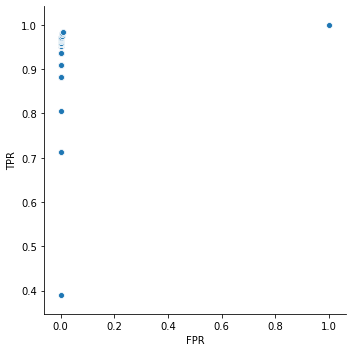

In [40]:
import seaborn as sns
sns.relplot(data=ROC_df_test,x='FPR',y='TPR')

The ROC for test is much sharper than that obtained using Random Forest

AUC for Test

In [41]:
from sklearn import metrics

auc_test = metrics.auc(ROC_df_test['FPR'],ROC_df_test['TPR'])

print('The test AUC is : \n', auc_test)

The test AUC is : 
 0.9917853866666667


In [42]:
index_row = ['Actually 0','Actually 1']
header_col = ['Predicted 0','Predicted 1']
conf_test = confusion_matrix(y_test,y_test_predicted)
test_conf = pd.DataFrame(conf_test,index=index_row,columns=header_col)
print('The confusion Matrix for test is : \n',test_conf)

The confusion Matrix for test is : 
             Predicted 0  Predicted 1
Actually 0        15616            9
Actually 1           16          359


Despite the imbalance weka tree classifies most 1's correctly

For Training Set

In [44]:
y_train_predicted = np.zeros(60000)
prob_train_0 = np.zeros(60000)
data_train = loader.load_file("aps_train_for_weka_index_normal.csv")
data_train.class_is_first()
cls_train = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
cls_train.build_classifier(data_train)
for index,inst in enumerate(data_train):
    pred = cls_train.classify_instance(inst)
    dist = cls_train.distribution_for_instance(inst)
    y_train_predicted[index] = pred
    prob_train_0[index] = dist[0]
    
print(y_train_predicted)
print(prob_train_0)

[0. 0. 0. ... 0. 0. 0.]
[0.9993956 0.9993956 0.9993956 ... 0.9993956 0.9993956 0.9993956]


In [45]:
frame_train = pd.read_csv('aps_train.csv',index_col=0)
y_train = frame_train['class']
train_mis = 0
for l in np.arange(0,60000):
    if y_train_predicted[l] != y_train[l]:
        train_mis = train_mis + 1

train_error = (train_mis/16000)*100
print('The train error obtained is : \n',train_error,'%')

The train error obtained is : 
 0.46875 %


In [46]:
ROC_df_train = pd.DataFrame(index=np.arange(0,np.size(threshold_range)),columns=['TPR','FPR'])
i=0
for i in pointer:
    y_train_predicted_new = (prob_train_0 <= threshold_range[i]).astype(int)
    conf_train_new = confusion_matrix(y_train,y_train_predicted_new)
    TPR = conf_train_new[1][1]/(conf_train_new[1][1]+conf_train_new[1][0])
    FPR = conf_train_new[0][1]/(conf_train_new[0][1]+conf_train_new[0][0])
    ROC_df_train.iloc[i,0]=TPR
    ROC_df_train.iloc[i,1]=FPR    
    
print(ROC_df_train)

       TPR          FPR
0    0.796            0
1    0.796            0
2    0.796            0
3    0.796            0
4    0.876  5.08475e-05
..     ...          ...
96   0.944   0.00118644
97   0.945   0.00172881
98   0.951   0.00530508
99    0.96    0.0151695
100      1            1

[101 rows x 2 columns]


The train AUC is : 
 0.9795706694915255


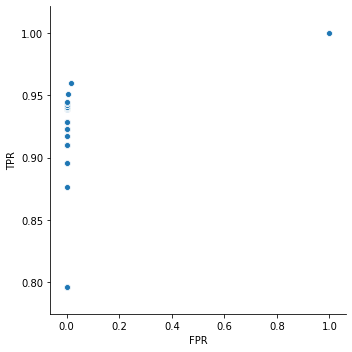

In [48]:
sns.relplot(data=ROC_df_train,x='FPR',y='TPR')
auc_train = metrics.auc(ROC_df_train['FPR'],ROC_df_train['TPR'])

print('The train AUC is : \n', auc_train)

Here, we have the train AUC lower than test AUC and the tr